The below project is done as a part of the following course by Jose Portilla - https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/ 

# Part 1 - Importing Libraries and Data Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
columns_names = ['user_id','item_id','rating','timestamp']

In [4]:
df = pd.read_csv('u.data',sep='\t',header=None,names=columns_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [7]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
df = pd.merge(df,movie_titles,on='item_id')

In [9]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Part 2 - Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [11]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [12]:
df['title'].value_counts().head(20)

Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     368
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

In [13]:
sns.set_style('whitegrid')

In [14]:
df.groupby(by='title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [15]:
df.groupby(by='title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [17]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [18]:
ratings['num_ratings'] = df.groupby(by='title')['rating'].count()

In [19]:
ratings.head()

,rating,num_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


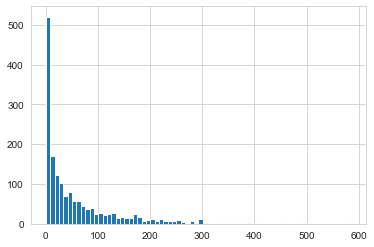

In [20]:
ratings['num_ratings'].hist(bins=70)
plt.show()
#Most movies have 0 or 1 ratings

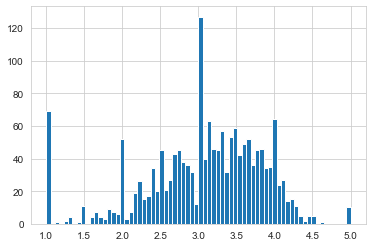

In [21]:
ratings['rating'].hist(bins=70)
plt.show()

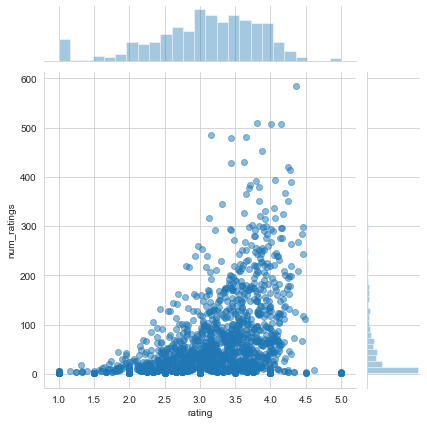

In [22]:
sns.jointplot(x='rating',y='num_ratings',data=ratings,alpha=0.5)
plt.show()

#More number of ratings are somewhat correlated with a higher rating 

# Part 3 - Building the Recommendation System

In [23]:
#Creating a matrix that has user ID on one axis and movie title on another axis
#Each cell will then have the rating that the user gave to that movie

movie_mat = df.pivot_table(index='user_id',columns='title',values='rating')

In [24]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
ratings.sort_values('num_ratings',ascending=False).head(10)

,rating,num_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [26]:
starwars_user_ratings = movie_mat['Star Wars (1977)']
liarliar_user_ratings = movie_mat['Liar Liar (1997)']

In [27]:
#Now we have a series of ratings for each user corresponding to Star Wars

starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [28]:
#Let us use pair-wise correlation to check the correlation of star-wars rating with other movies

similar_to_starwards = movie_mat.corrwith(starwars_user_ratings)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [29]:
similar_to_liarliar = movie_mat.corrwith(liarliar_user_ratings)

In [30]:
corr_starwars = pd.DataFrame(similar_to_starwards,columns=['Correlations'])
corr_starwars.dropna(inplace=True)

In [31]:
corr_starwars.head()

,Correlations
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [32]:
corr_starwars.sort_values(by='Correlations',ascending=False).head(10)

,Correlations
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


The issue that we encounter is that a lot of movies are not quite popular. This happens because a single user might have watched both star wars and lesser known movie. Hence, **we need to put a threshold on the number of user ratings** before letting it into our recommnder system

In [33]:
#Let us add number of ratings in another column here
corr_starwars = corr_starwars.join(ratings['num_ratings'])

In [34]:
corr_starwars.head()

,Correlations,num_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [35]:
#Filter out any movie that has less than 100 ratings. This gives us 334 titles

corr_starwars[corr_starwars['num_ratings']>100].sort_values(by='Correlations',ascending=False)

,Correlations,num_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


Observation 1: Now we can confidently saw that a **user who liked Star Wars is highly likely to like Empire Strikes Back and Return of the Jedi** (keeping more than 0.6 as correlation cutoff) 

In [36]:
#Similarly let us explore liar liar now

corr_liarliar = pd.DataFrame(data=similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [37]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [38]:
corr_liarliar = corr_liarliar.join(ratings['num_ratings'])

In [39]:
corr_liarliar[corr_liarliar['num_ratings']>100].sort_values(
    by='Correlation',ascending=False).head(10)

,Correlation,num_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


Observation 2: Here we can see that **users who liked Liar Liar will most likely also like Batman Forever and The Mask**